In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

### Extract CSVs into DataFrames

### Shoe One Data - Extracting

In [2]:
shoes_one = "Resources/shoe_data_1.csv"
shoes_one_df = pd.read_csv(shoes_one)

shoes_one_df.head()

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean,...,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,weight
0,AVpfEf_hLJeJML431ueH,2015-05-04T12:13:08Z,2018-01-29T04:38:43Z,NaN,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,"Silver,Cream Watercolor Floral",NaN,NaN,...,Overstock.com,NaN,NaN,NaN,S,https://www.overstock.com/Clothing-Shoes/Women...,"6W,9W,7.5W,12W,8.5M,9N,9M,9.5M,10.5M,10W,8.5W,...",https://www.walmart.com/ip/Naturalizer-Danya-W...,017136472311,NaN
1,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Walmart.com,NaN,NaN,Standard,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
2,AVpi74XfLJeJML43qZAc,2017-01-27T01:23:39Z,2018-01-03T05:21:54Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Shoes,Grey,NaN,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,033977045743,NaN
3,AVpjXyCc1cnluZ0-V-Gj,2017-01-27T01:25:56Z,2018-01-04T11:52:35Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Shoes,Shoes",Black,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Slippers Dot Com,NaN,NaN,Value,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045903,NaN
4,AVphGKLPilAPnD_x1Nrm,2017-01-27T01:25:56Z,2018-01-18T03:55:18Z,NaN,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Shoes,Grey,6.0 in x 6.0 in x 1.0 in,3.397705e+10,...,Walmart.com,NaN,NaN,Expedited,6,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,"10,7,6,9,8",https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,033977045958,NaN


In [3]:
#shoes_one_df.brand.unique()

In [4]:
#df_adidas = shoes_one_df.loc[shoes_one_df.brand=='adidas',:]
#df_adidas.head()

In [5]:
#df_adidas.columns

In [6]:
#df_adidas['prices.amountMax'].mean()

### Shoe One Data - Transforming

##### Cleaning

In [7]:
# remove duplicates and columns with null values - dataframe 1
shoes_one_df.drop_duplicates()
shoes_one_df.dropna(axis= 1, how = "any", inplace = True)
#shoes_one_df.isnull().sum()

shoes_one_df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'brand', 'categories',
       'primaryCategories', 'imageURLs', 'keys', 'name', 'prices.amountMax',
       'prices.amountMin', 'prices.color', 'prices.currency',
       'prices.dateSeen', 'prices.isSale', 'prices.size', 'prices.sourceURLs',
       'sizes', 'sourceURLs'],
      dtype='object')

In [41]:
# dropped unneeded columns and renamed columns
shoes_one_transformed = shoes_one_df[["brand", "categories", "prices.color", "prices.amountMax", "prices.amountMin", "prices.sourceURLs", "dateAdded"]]

shoes_one_renamed = shoes_one_transformed.rename(columns = {"prices.color":"color", 
                                                                "prices.amountMax":"max_price", "prices.amountMin":"min_price",
                                                                "prices.sourceURLs":"website", "dateAdded":"date"})

shoes_one_renamed.head()

,brand,categories,color,max_price,min_price,website,date
0,Naturalizer,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",UWomens M Regular,55.99,55.99,https://www.overstock.com/Clothing-Shoes/Women...,2015-05-04T12:13:08Z
1,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Grey,47.00,35.25,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,2017-01-27T01:23:39Z
2,MUK LUKS,"Clothing,Shoes,Women's Shoes,Women's Casual Sh...",Grey,35.25,35.25,https://www.walmart.com/ip/MUK-LUKS-Womens-Jan...,2017-01-27T01:23:39Z
3,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Black,24.75,24.75,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,2017-01-27T01:25:56Z
4,MUK LUKS,"Clothing,Shoes,Women's Shoes,All Women's Shoes...",Grey,33.00,30.39,https://www.walmart.com/ip/MUK-LUKS-Womens-Daw...,2017-01-27T01:25:56Z


In [42]:
# change all characters in "Brand" columsn to lowercase
shoes_one_renamed["brand"] = shoes_one_renamed["brand"].str.lower()


##### aggregating

In [32]:
# groupby "Brands" and find average max and min price each
shoes_one_branded = shoes_one_renamed.groupby("brand").mean()

In [33]:
# sorting shoe price values
shoes_one_sorted = shoes_one_branded.sort_values(by = "max_price", ascending = False).head(10)
shoes_one_sorted

,max_price,min_price
brand,,
red wing,345.950000,345.950000
lowa,199.950000,92.835714
free people,178.000000,178.000000
arc'teryx,170.000000,130.333333
scarpa,169.700000,120.975000
frye,165.450000,133.195000
on footwear,159.990000,159.990000
la sportiva,152.500000,146.375000
mlb,151.240000,151.240000


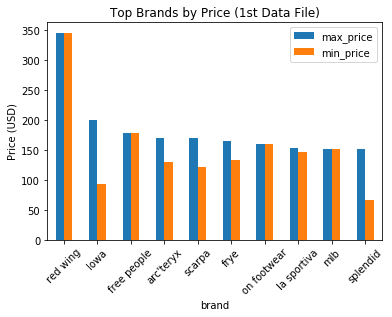

In [34]:
ax = shoes_one_sorted.head(10).plot.bar();

plt.xticks(rotation = 45);
plt.title ("Top Brands by Price (1st Data File)");
plt.ylabel ("Price (USD)");

### Shoe Two Data - Extracting

In [13]:
shoes_two = "Resources/shoe_data_2.csv"
shoes_two_df = pd.read_csv(shoes_two)
shoes_two_df.head()

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean / upc,...,prices.dateSeen,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs
0,AWpyySsJAGTnQPR7wNt4,2019-05-01T09:27:22Z,2019-05-01T09:27:22Z,NaN,City Classified,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,656000000000,...,2019-04-19T07:09:29Z,NaN,NaN,Online only,NaN,NaN,8,https://www.walmart.com/ip/City-Classified-Sty...,8,https://www.walmart.com/ip/City-Classified-Sty...
1,AWpyyyb3AGTnQPR7wN-u,2019-05-01T09:27:19Z,2019-05-01T09:27:19Z,NaN,Skechers,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Taupe,NaN,192000000000,...,2019-04-24T09:14:11Z,NaN,NaN,Online only,NaN,NaN,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...
2,AWpyzlajAGTnQPR7wOX8,2019-05-01T09:26:59Z,2019-05-01T09:26:59Z,NaN,Floral,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,709000000000,...,2019-04-25T12:35:00.000Z,NaN,NaN,Online only,NaN,NaN,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...
3,AWpyxomE0U_gzG0hkA1q,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z,NaN,Jambu,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black/Multi,NaN,884000000000,...,2019-04-30T19:49:00.000Z,NaN,NaN,Online only: 20% off,NaN,NaN,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...
4,AWpyxChWJbEilcB6RhWx,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z,NaN,Trotters,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,White,NaN,887000000000,...,2019-04-19T07:07:46Z,NaN,NaN,Online only: 50% off,NaN,NaN,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...


### Shoe Two Data - Transforming

##### cleaning

In [14]:
# remove duplicates and columns with null values - dataframe 1
shoes_two_df.drop_duplicates()
shoes_two_df.dropna(axis= 1, how = "any", inplace = True)
#shoes_two_df.isnull().sum()

#shoes_two_df.columns

In [44]:
# dropped unneeded columns and renamed columns
shoes_two_transformed = shoes_two_df[["brand", "categories", "prices.color", "prices.amountMax", "prices.amountMin", "prices.sourceURLs", "dateAdded"]]

shoes_two_renamed = shoes_two_transformed.rename(columns = {"prices.color":"color", 
                                                                "prices.amountMax":"max_price", "prices.amountMin":"min_price",
                                                                "prices.sourceURLs":"website", "dateAdded":"date"})

shoes_two_renamed.head()

,brand,categories,color,max_price,min_price,website,date
0,City Classified,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Black,29.95,29.95,https://www.walmart.com/ip/City-Classified-Sty...,2019-05-01T09:27:22Z
1,Skechers,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Taupe,84.00,84.00,https://www.walmart.com/ip/Skechers-Women-S-Yo...,2019-05-01T09:27:19Z
2,Floral,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Black,49.95,49.95,https://www.walmart.com/ip/FLORAL-Pearl-Women-...,2019-05-01T09:26:59Z
3,Jambu,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Black/Multi,127.20,127.20,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...,2019-05-01T09:26:56Z
4,Trotters,"Clothing,Shoes,Womens Shoes,All Womens Shoes",White,47.66,47.66,https://www.walmart.com/ip/Women-s-Trotters-Bl...,2019-05-01T09:26:56Z


In [45]:
# change all characters in "Brand" columsn to lowercase
shoes_two_renamed["brand"] = shoes_two_renamed["brand"].str.lower()

##### aggregating

In [46]:
# groupby "Brands" and find average max and min price each
shoes_two_branded = shoes_two_renamed.groupby("brand").mean()

In [47]:
# sorting shoe price values
shoes_two_sorted = shoes_two_branded.sort_values(by = "max_price", ascending = False).head(10)
shoes_two_sorted

,max_price,min_price
brand,,
steve-madden,1367.785000,1367.785000
faux suede,1298.100000,1298.100000
tabitha simmons,545.000000,545.000000
totes,532.961000,532.961000
mobils by mephisto,327.865000,327.865000
puma,325.265088,325.265088
stuart weitzman,252.896667,252.896667
aaron,229.980000,229.980000
vasque,219.990000,219.990000


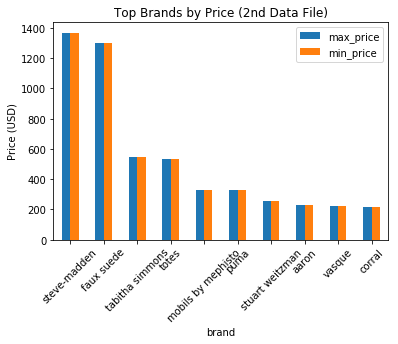

In [48]:
ax = shoes_two_sorted.head(10).plot.bar();

plt.xticks(rotation = 45);
plt.title ("Top Brands by Price (2nd Data File)");
plt.ylabel ("Price (USD)");

### Join Data Files 1 and 2

In [53]:
shoes_joined = shoes_one_branded.merge(shoes_two_branded, on = "brand", how = "inner", suffixes = ("_2018", "_2019"))
shoes_joined

,max_price_2018,min_price_2018,max_price_2019,min_price_2019
brand,,,,
a2 by aerosoles,74.348209,50.225522,40.142708,40.142708
adidas,80.981158,66.320737,61.459130,61.459130
asics,83.907231,79.322846,85.160000,85.160000
bogs,64.990000,64.990000,126.358125,126.358125
brinley co.,35.818108,31.317838,35.858352,35.858352
brooks,125.213158,119.951579,111.957778,111.957778
carrini,34.950000,20.450000,14.500000,14.500000
chaco,119.950000,119.950000,86.660000,86.660000
corkys,69.990000,69.990000,39.990000,39.990000


Text(0, 0.5, 'Price (USD)')

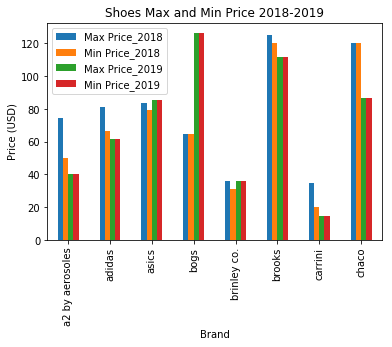

In [21]:
shoes_joined.head(8).plot.bar();

plt.title("Shoes Max and Min Price 2018-2019");
plt.ylabel("Price (USD)")

### Shoe Data Loading

#### Create Database Connection

In [22]:
# Create database connection
connection_string = "postgres:Akela2019!!@localhost:5432/shoes_db"
engine = create_engine(f'postgresql://{connection_string}')

In [23]:
# Confirm tables
engine.table_names()


['shoes_one', 'shoes_two']

#### Load Dataframes into database

In [43]:
shoes_one_renamed.to_sql(name = "shoes_one", con=engine, if_exists = 'append', index = False)

In [50]:
shoes_two_renamed.to_sql(name = "shoes_two", con=engine, if_exists = 'append', index = False)